In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from sklearn.metrics import classification_report
import time 

In [7]:
import os

directory = '/Users/ASUS/Downloads/archive/dataset/train'
contents = os.listdir(directory)
num_of_dirs = len([name for name in contents if os.path.isdir(os.path.join(directory, name))])

print("Contents of the directory:")
for item in contents:
    print(item)

print(f"\nNumber of directories: {num_of_dirs}")


Contents of the directory:
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Chili__healthy
Chili__leaf curl
Chili__leaf spot
Chili__whitefly
Chili__yellowish
Coffee__healthy
Coffee__red spider mite
Coffee__Rust
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_

In [9]:
from PIL import Image
import os

# Define the directory path
directory_path = '/Users/ASUS/Downloads/archive/dataset/train'

# List all files in the directory
file_names = os.listdir(directory_path)

# Load images from the directory
images = []
for file_name in file_names:
    if file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
        image_path = os.path.join(directory_path, file_name)
        image = Image.open(image_path)
        images.append(image)

# Process the images as required
# ...

# Example: Showing the first image
if images:
    images[0].show()
else:
    print("No images found in the directory.")

No images found in the directory.


In [11]:
# Define parameters
batch_size = 128
num_epochs = 40
image_size = (139, 139)
num_classes = 41


In [13]:
# Load the InceptionV3 model
image_input = Input(shape=(*image_size, 3))
inception_model = InceptionV3(input_tensor=image_input, weights='imagenet', include_top=False)


In [15]:
# Add a new classification layer
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
class_outputs = Dense(num_classes, activation='softmax')(x)


In [ ]:
# Create the model
model = Model(inputs=inception_model.input, outputs=class_outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

print("Model compiled successfully")

# Load the training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_dataset = train_datagen.flow_from_directory(
    '/Users/ASUS/Downloads/archive/dataset/train',
    target_size=(139, 139),
    batch_size=10,
    class_mode='categorical'
)
print("Training data loaded successfully")

# Load the validation data
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_dataset = val_datagen.flow_from_directory(
    '/Users/ASUS/Downloads/archive/dataset/train',  # Make sure this path is correct
    target_size=(139, 139),
    batch_size=10,
    class_mode='categorical'
)
print("Validation data loaded successfully")

# Train the model and store the history
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset
)
print("Model trained successfully")

# Evaluate the model on the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    '/Users/ASUS/Downloads/archive/dataset/test',
    target_size=(139, 139),
    batch_size=10,
    class_mode='categorical'
)
print("Test data loaded successfully")

# Save the model
model.save('plant_disease_model_inception.h5')
print("Model saved successfully")


Model compiled successfully
Found 33111 images belonging to 41 classes.
Training data loaded successfully
Found 33111 images belonging to 41 classes.
Validation data loaded successfully
Epoch 1/30


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3312/3312 ━━━━━━━━━━━━━━━━━━━━ 966s 280ms/step - accuracy: 0.1681 - loss: 3.2472 - val_accuracy: 0.3597 - val_loss: 2.2185
Epoch 2/30
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 920s 278ms/step - accuracy: 0.2393 - loss: 2.8100 - val_accuracy: 0.3451 - val_loss: 12.6682
Epoch 3/30
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 929s 280ms/step - accuracy: 0.3822 - loss: 2.1590 - val_accuracy: 0.5821 - val_loss: 1.3441
Epoch 4/30
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 922s 278ms/step - accuracy: 0.4843 - loss: 1.7101 - val_accuracy: 0.6315 - val_loss: 1.5720
Epoch 5/30
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 908s 274ms/step - accuracy: 0.5596 - loss: 1.4725 - val_accuracy: 0.7096 - val_loss: 2.3479
Epoch 6/30
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 911s 275ms/step - accuracy: 0.6560 - loss: 1.1279 - val_accuracy: 0.8181 - val_loss: 0.5617
Epoch 7/30
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 913s 276ms/step - accuracy: 0.7161 - loss: 0.9273 - val_accuracy: 0.7975 - val_loss: 1.4106
Epoch 8/30
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 917s 277ms/step - accuracy: 0.

In [35]:
# Save the model in native Keras format
model.save('plant_disease_model_inception.keras')

import joblib

# Save the model using joblib
joblib.dump(model, 'plant_disease_model_inception.pkl')


['plant_disease_model_inception.pkl']

In [39]:
# Save model weights
model.save_weights('model_weights.weights.h5')

# Save model configurations (architecture, optimizer state, etc.)
model_config = model.get_config()
with open('model_config.pkl', 'wb') as config_file:
    joblib.dump(model_config, config_file)


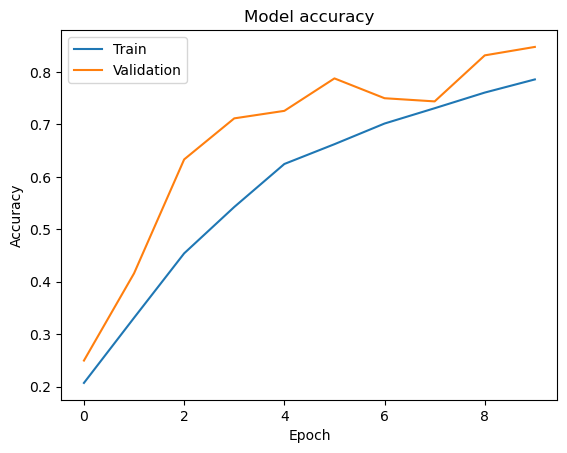

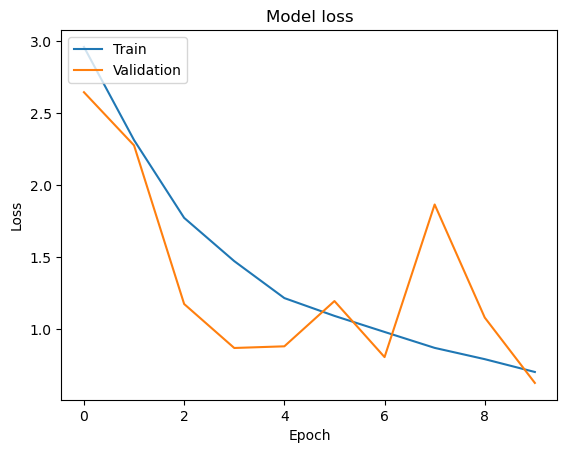

In [43]:
# Plot the metrics to visualize the training process
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_metrics(history)

In [47]:
# Load the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = test_datagen.flow_from_directory(
    '/Users/ASUS/Downloads/archive/dataset/test',
    target_size=(139, 139),
    batch_size=10,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain the order for evaluation
)

# Evaluate the model on the test data
start_time = time.time()
evaluation_result = model.evaluate(test_dataset)
print("Time taken to evaluate the model: " + str(time.time() - start_time))

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

# Make predictions on the test set
y_pred = model.predict(test_dataset)
y_pred_bool = np.argmax(y_pred, axis=1)

# Get true labels directly from test_dataset
true_labels = test_dataset.labels

# Print the classification report
print(classification_report(true_labels, y_pred_bool, digits=4))

# Optionally, you can save the evaluation results for further analysis
np.savetxt("y_true.txt", true_labels, fmt="%d")
np.savetxt("y_pred.txt", y_pred_bool, fmt="%d")


Found 8339 images belonging to 41 classes.
  3/834 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9056 - loss: 0.3310 

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


834/834 ━━━━━━━━━━━━━━━━━━━━ 55s 65ms/step - accuracy: 0.8368 - loss: 0.8588
Time taken to evaluate the model: 54.559985876083374
Test Loss: 0.6827265620231628
Test Accuracy: 0.8447055816650391
834/834 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step
              precision    recall  f1-score   support

           0     0.7591    0.8254    0.7909       126
           1     0.7568    0.9032    0.8235       124
           2     1.0000    0.8182    0.9000        55
           3     0.9214    0.8906    0.9057       329
           4     0.7778    0.9667    0.8620       210
           5     0.7617    0.9588    0.8490       170
           6     1.0000    0.1000    0.1818        10
           7     0.0000    0.0000    0.0000        10
           8     0.0000    0.0000    0.0000        10
           9     0.2500    0.1000    0.1429        10
          10     0.4737    0.9000    0.6207        10
          11     0.6279    0.2328    0.3396       116
          12     0.5511    0.9869    0.7073       153
      

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix
# import joblib
# import numpy as np

# # Extract features from the InceptionV3 model
# train_features = model.predict(train_dataset)
# val_features = model.predict(train_dataset)

# # Flatten the features
# train_features_flatten = train_features.reshape(train_features.shape[0], -1)
# val_features_flatten = val_features.reshape(val_features.shape[0], -1)

# # Scale the data
# scaler = StandardScaler()
# train_features_scaled = scaler.fit_transform(train_features_flatten)
# val_features_scaled = scaler.transform(val_features_flatten)

# # Ensure train_labels is a 1D array
# train_labels = np.argmax(train_labels, axis=1)

# # Train the SVM classifier
# svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
# svm_model.fit(train_features_scaled, train_labels)

# # Save the SVM model
# joblib.dump(svm_model, 'svm_model.pkl')

# # Make predictions on the validation set
# val_predictions = svm_model.predict(val_features_scaled)

# # Convert val_labels to 1D array
# val_labels = np.argmax(val_labels, axis=1)

# # Print the classification report and confusion matrix
# print("Classification Report:")
# print(classification_report(val_labels, val_predictions))
# print("\nConfusion Matrix:")
# print(confusion_matrix(val_labels, val_predictions))
